# Introduction to Simple Linear Regression

In this very simple example, we'll explore how to create a very simple fit line, 
Using y=mx+b. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df["TV"] + df["radio"] + df["newspaper"]

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

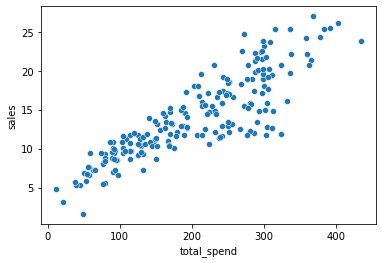

In [5]:
sns.scatterplot(x=df['total_spend'], y = df["sales"],data=df)

Is there a relationship between total advertising spend and sales?
It appears that as the total spend increases the sales increases

## Least Squares Line

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,as well as in ISLR reading.

**Understanding what a line of best fit answers.**


Let's say if company X spends $200 on ad campaign, what would be the expected sales ? I have simplified this quite a bit by combining all the features into "total spend",For now, let's focus on understanding what a linear regression line can help answer.

**So next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

**Let's find out**

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

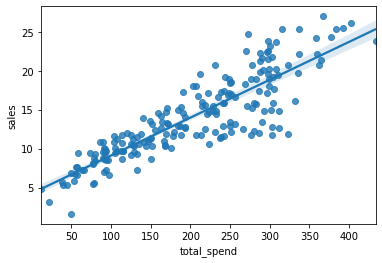

In [6]:
sns.regplot(x=df['total_spend'], y = df["sales"],data=df)

**Let's go ahead and start solving: $$y=mx+b$$**

Simply solve for m and b, remember, 
We can use NumPy for this

In [7]:
X = df['total_spend']
y = df["sales"]

In [8]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [9]:
# Returns highest order coef first!

m,b = np.polyfit(X,y,1)

In [10]:
m

0.04868787931904817

In [11]:
b

4.243028216036326

In [12]:
# Let's create some Potential Future Spend Budgets


potential_spend = np.linspace(0,500,101)
potential_spend

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495., 500.])

In [13]:
# note m = 0.04868788 
# and b = 4.24302822
predicted_sales =  m*potential_spend + b

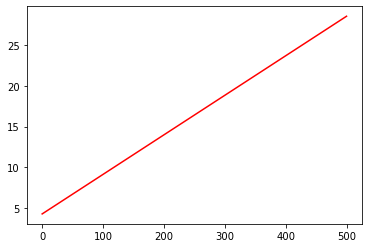

In [14]:
plt.plot(potential_spend,predicted_sales,color = 'red')

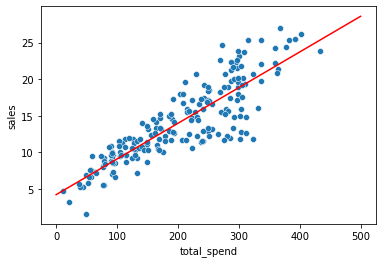

In [15]:
sns.scatterplot(x=df['total_spend'], y = df["sales"],data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Now let's say company has ad level budget total spend of $200, how many units do we expect to sell as a result of this spend?**

In [16]:
# Note the sale unit is in thousand's and spend is in thousand's of dollars
spend = 200
sales = m*spend +b
sales

13.98060407984596

In [17]:
spend = 200
predicted_sales =  m*spend + b

In [18]:
predicted_sales

13.98060407984596

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line,

 we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit? Let's see

In [19]:
# where a b c are co-efficients and d is constant

In [20]:
a,b,c,d = np.polyfit(X,y,3)

In [21]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [22]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,101)

In [23]:
predicted_sales = a*potential_spend**3+b*potential_spend**2 + c*potential_spend + d

In [24]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

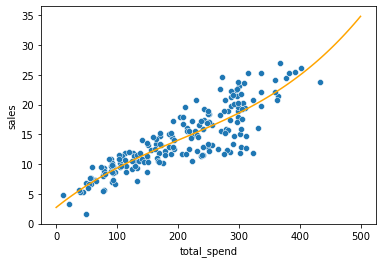

In [25]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='orange')

**Is this better than our straight line fit? What are good ways of measuring this?**

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

In [26]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [27]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Uh oh! Polyfit only works with a 1D X array! We'll need to move on to a more powerful library...**

## Linear Regression with SciKit-Learn

In [28]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Previously, we explored Is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend. Now we want to expand this to What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?

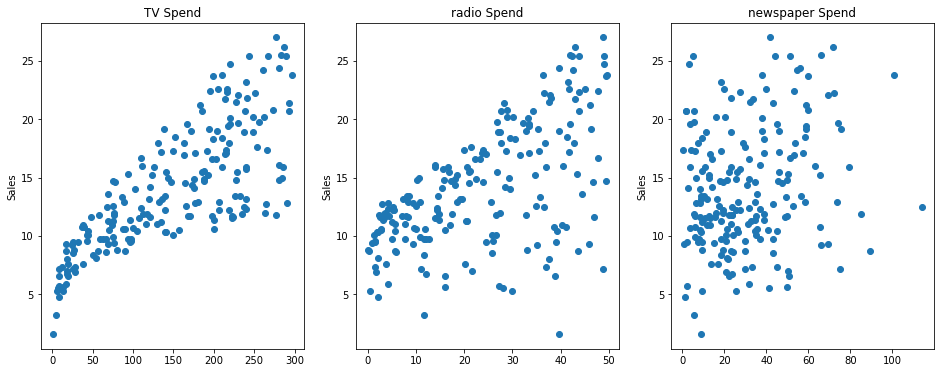

In [29]:
fig,axes = plt.subplots(nrows =1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("newspaper Spend")

plt.show()

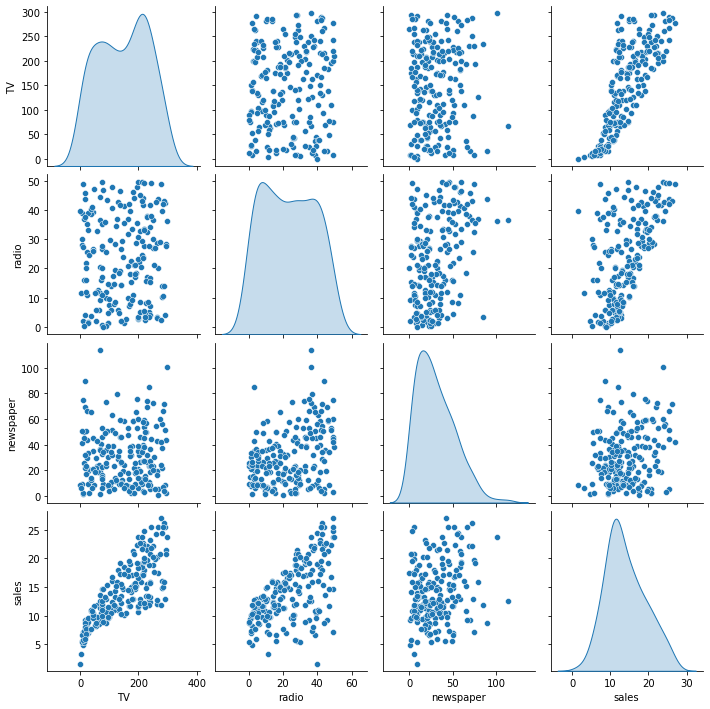

In [30]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

## Introducing SciKit Learn
We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

In [31]:
X = df.drop('sales',axis=1)
y = df['sales']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [35]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [36]:
X_test.head(5)

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [37]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

### Creating a Model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## Calculate Performance on Test Set

In [41]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [42]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [44]:
print('mean_absolute_error :',MAE)
print('mean_squared_error :',MSE)
print('root mean squared value :',RMSE)

mean_absolute_error : 1.213745773614481
mean_squared_error : 2.2987166978863782
root mean squared value : 1.516151937599388


In [45]:
df['sales'].mean()

14.022500000000003

### Retraining Model on Full Data
If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [46]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

# Deployment, Predictions, and Model Attributes

In [47]:
y_hat = final_model.predict(X)

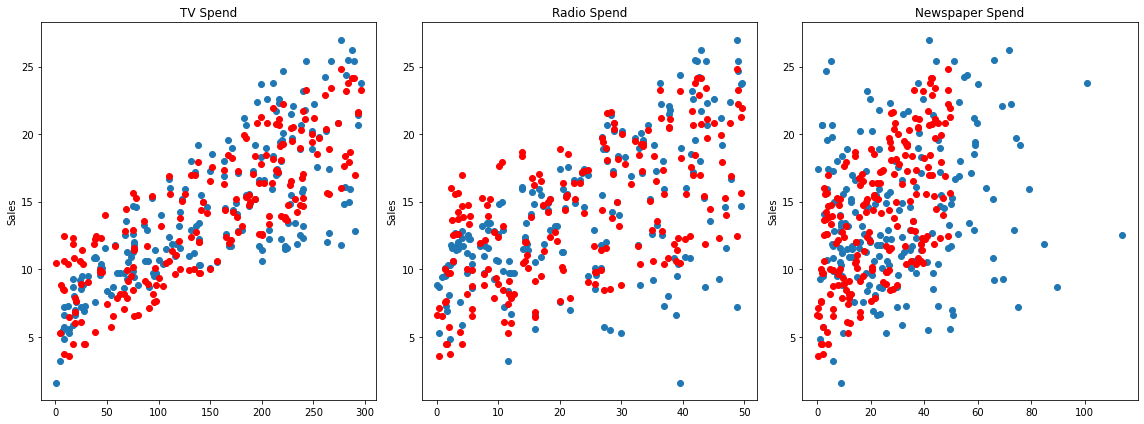

In [48]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [49]:
residuals = y_hat - y

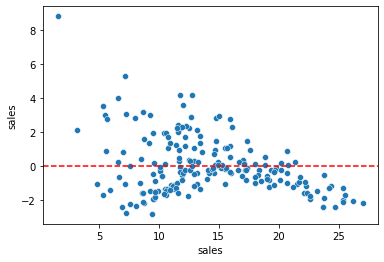

In [50]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [51]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpreting the coefficients:

Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of 0.045 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.


Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of 0.188 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.


Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a decrease in sales of 0.001 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.

In [53]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Prediction on New Data
Recall , X_test data set looks exactly the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.


Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?

In [54]:
campaign = [[149,22,12]]

In [55]:
final_model.predict(campaign)

array([13.893032])

# Model Persistence (Saving and Loading a Model)

In [56]:
import pickle

In [57]:
# Saving model to disk
pickle.dump(final_model, open('sales_model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('sales_model.pkl','rb'))
print(model.predict(campaign))

[13.893032]


# Thank You

-------
--------